<div style="display:fill;
            border-radius:15px;
            background-color:#03396c;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
 Lung Cancer Detection Model

    

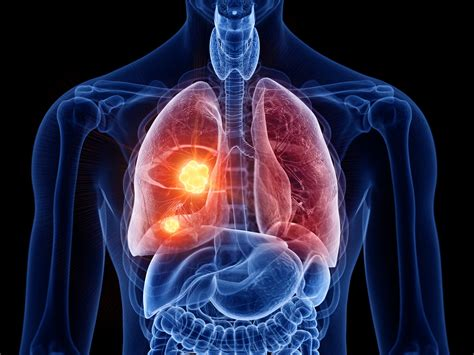

# <b>1 <span style='color:#6497b1'>|</span> Importing Libraries and Loading dataset</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [2]:
df = pd.read_csv("../input/lung-cancer/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | About the dataset</b></p>
</div>

**The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status.**

### Attribute information:
Total no. of attributes: **16** <br>
No .of instances:       **284**


01. **Gender**: M(male), F(female)
02. **Age**: Age of the patient
03. **Smoking**: YES=2 , NO=1.
04. **Yellow fingers**: YES=2 , NO=1.
05. **Anxiety**: YES=2 , NO=1.
06. **Peer_pressure**: YES=2 , NO=1.
07. **Chronic Disease**: YES=2 , NO=1.
08. **Fatigue**: YES=2 , NO=1.
09. **Allergy**: YES=2 , NO=1.
10. **Wheezing**: YES=2 , NO=1.
11. **Alcohol**: YES=2 , NO=1.
12. **Coughing**: YES=2 , NO=1.
13. **Shortness of Breath**: YES=2 , NO=1.
14. **Swallowing Difficulty**: YES=2 , NO=1.
15. **Chest pain**: YES=2 , NO=1.
16. **Lung Cancer**: YES , NO.

# <b>2 <span style='color:#6497b1'>|</span> Understanding Our Data</b>

In [3]:
#What is the shape of the dataset?
df.shape

(309, 16)

In [4]:
#Some info about our attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
#Some analysis on the numerical columns
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**Here we can observe the following:** <br>
1. **AGE** - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.
2. **SMOKING** - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.
3. **YELLOW_FINGERS** - The dataset is mostly composed of people with yellow fingers. Inferred from mean.
4. **ANXIETY** - The dataset is balanced in this regard.
5. **PEER_PRESSURE** - The dataset is balanced in this regard.
6. **CHRONIC_DISEASE** - The dataset is balanced in this regard.
7. **FATIGUE** - The dataset mostly composes of people with signs of fatigueness.
8. **ALLERGY** - The dataset mostly composes of people with allergy.
9. **WHEEZING** - The dataset mostly composes of people with wheezing symptom.
10. **ALCOHOL CONSUMING** - The dataset mostly composes of people who consumes alcohol.
11. **COUGHING** - The dataset mostly composes of people with coughing symptom.
12. **SHORTNESS OF BREATH** - The dataset mostly composes of people with shortness of breath.
13. **SWALLOWING DIFFICULTY** - The dataset mostly composes of people with **not having difficulty with swallowing.**
14. **CHEST PAIN** - The dataset mostly composes of people with chest pain.

**Will confirm these observations in the EDA section**

In [6]:
#Check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Great we have no null values in the dataset!**

In [7]:
#Check for duplicates in the dataset
df.duplicated().sum()

33

**We have 33 duplicate values in our dataset. Let's drop these rows!**

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(276, 16)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Encoding of Categorical Columns</b></p>
</div>

**A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding <mark>LUNG_CANCER</mark> and <mark>GENDER</mark> column.**

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# <b>3 <span style='color:#6497b1'>|</span> Exploratory Data Analysis</b>


In [11]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

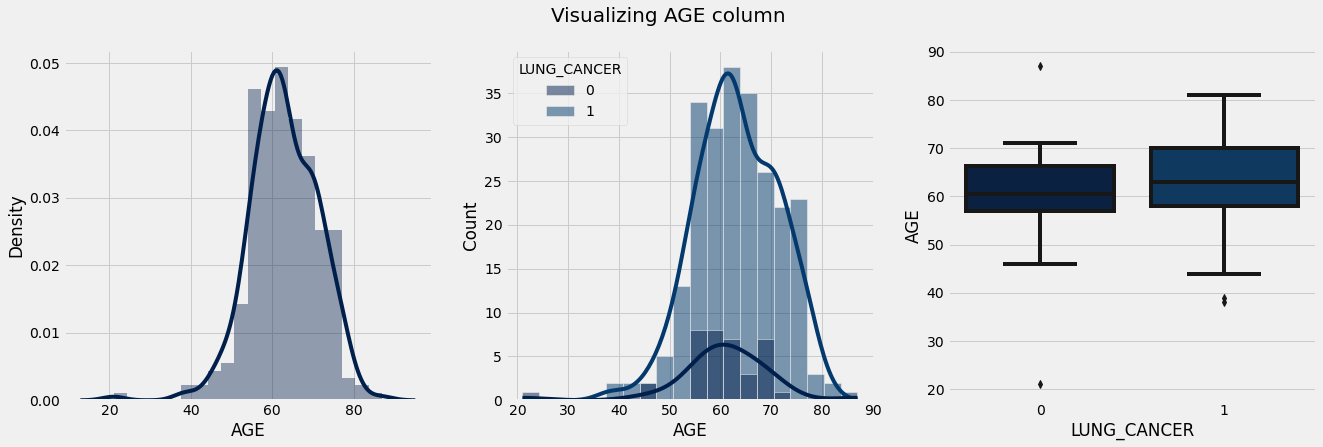

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

### Observations:
> Some outliers are present in the dataset. Inferred from box-plot.<br>
> Most common age ranges from 50-70. This was also inferred from <mark>describe method.</mark>

Text(0.5, 0.98, 'Visualizing Categorical Columns')

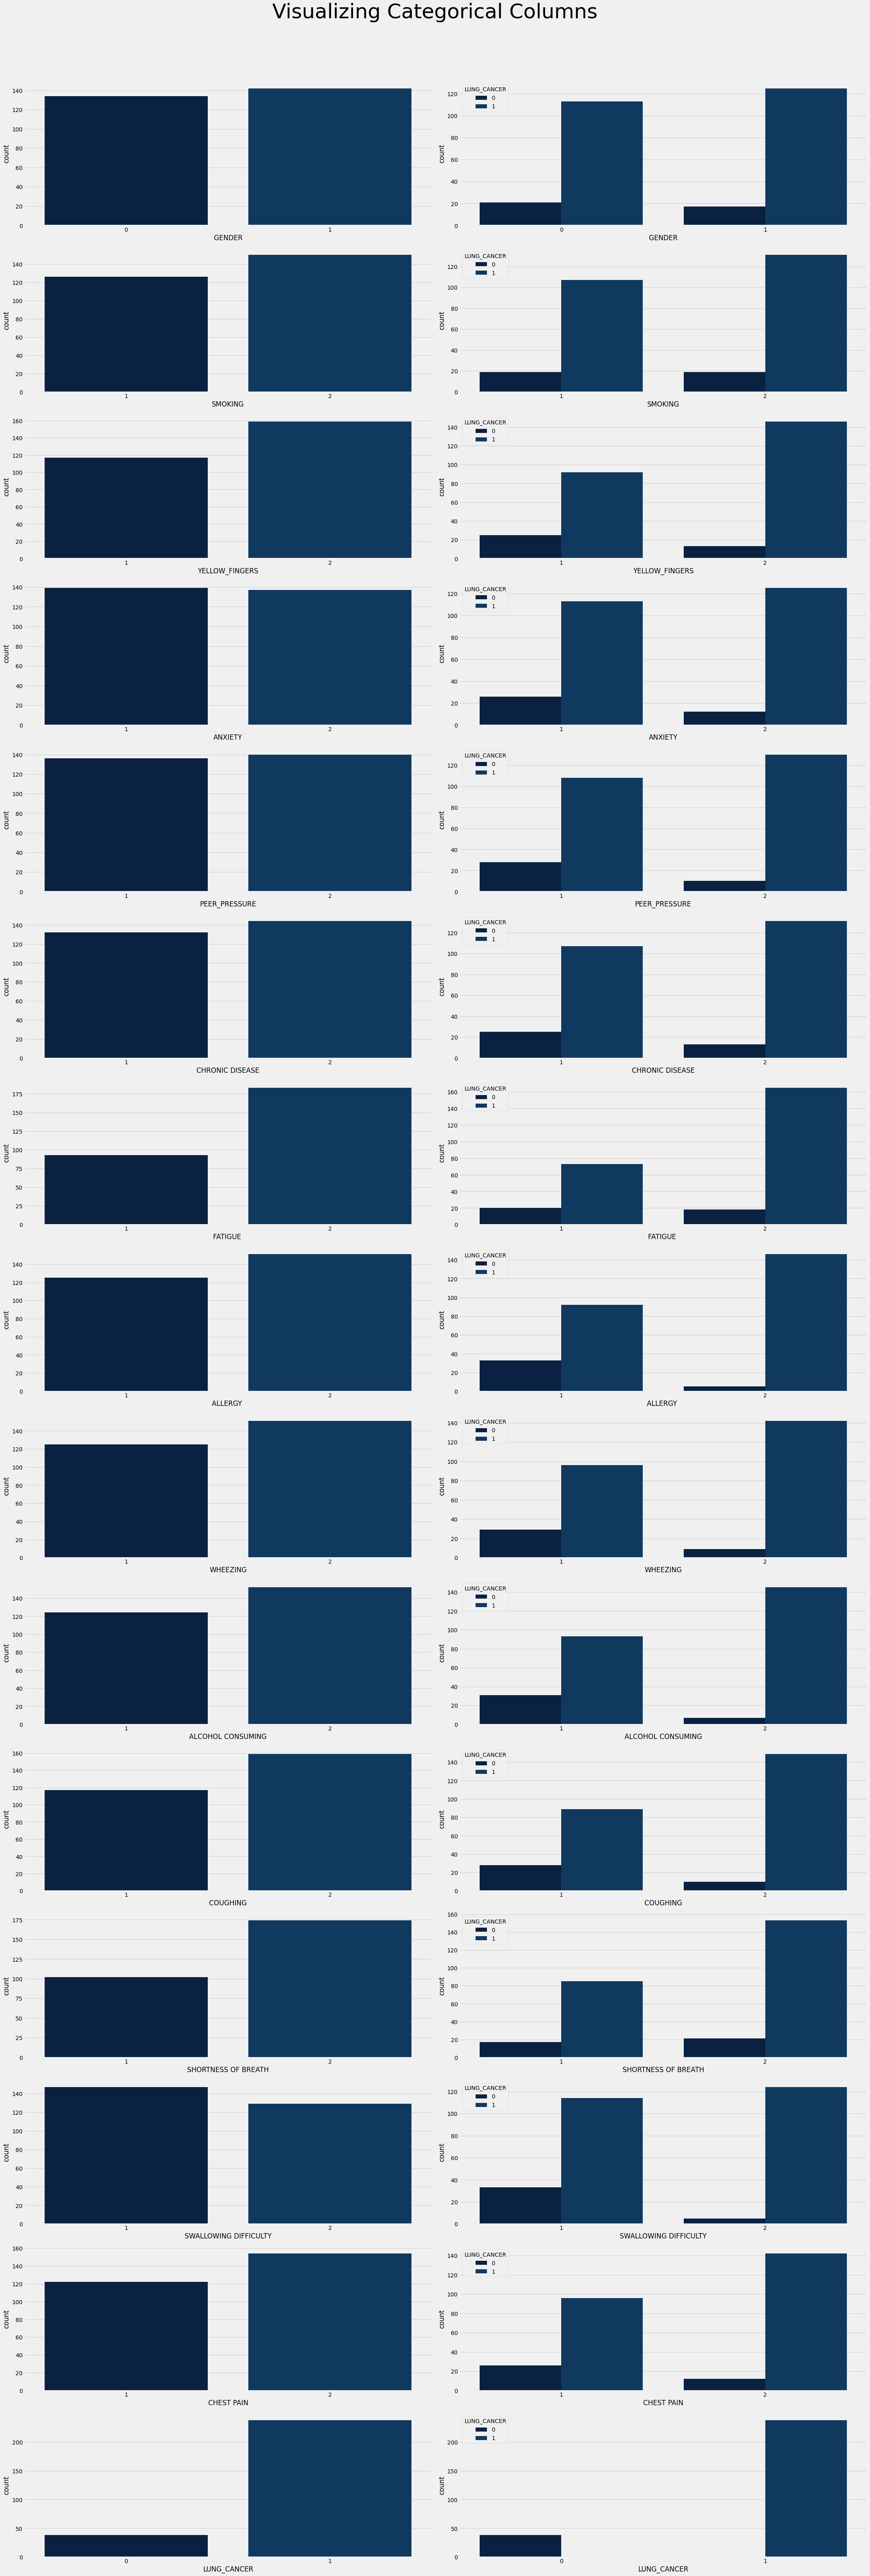

In [14]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

### Observations:
> There is a huge imabalance present in the dataset. Samples with Lung Cancer are present in higher numbers. <br>
> All the observations made from describe function is confirmed here.

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

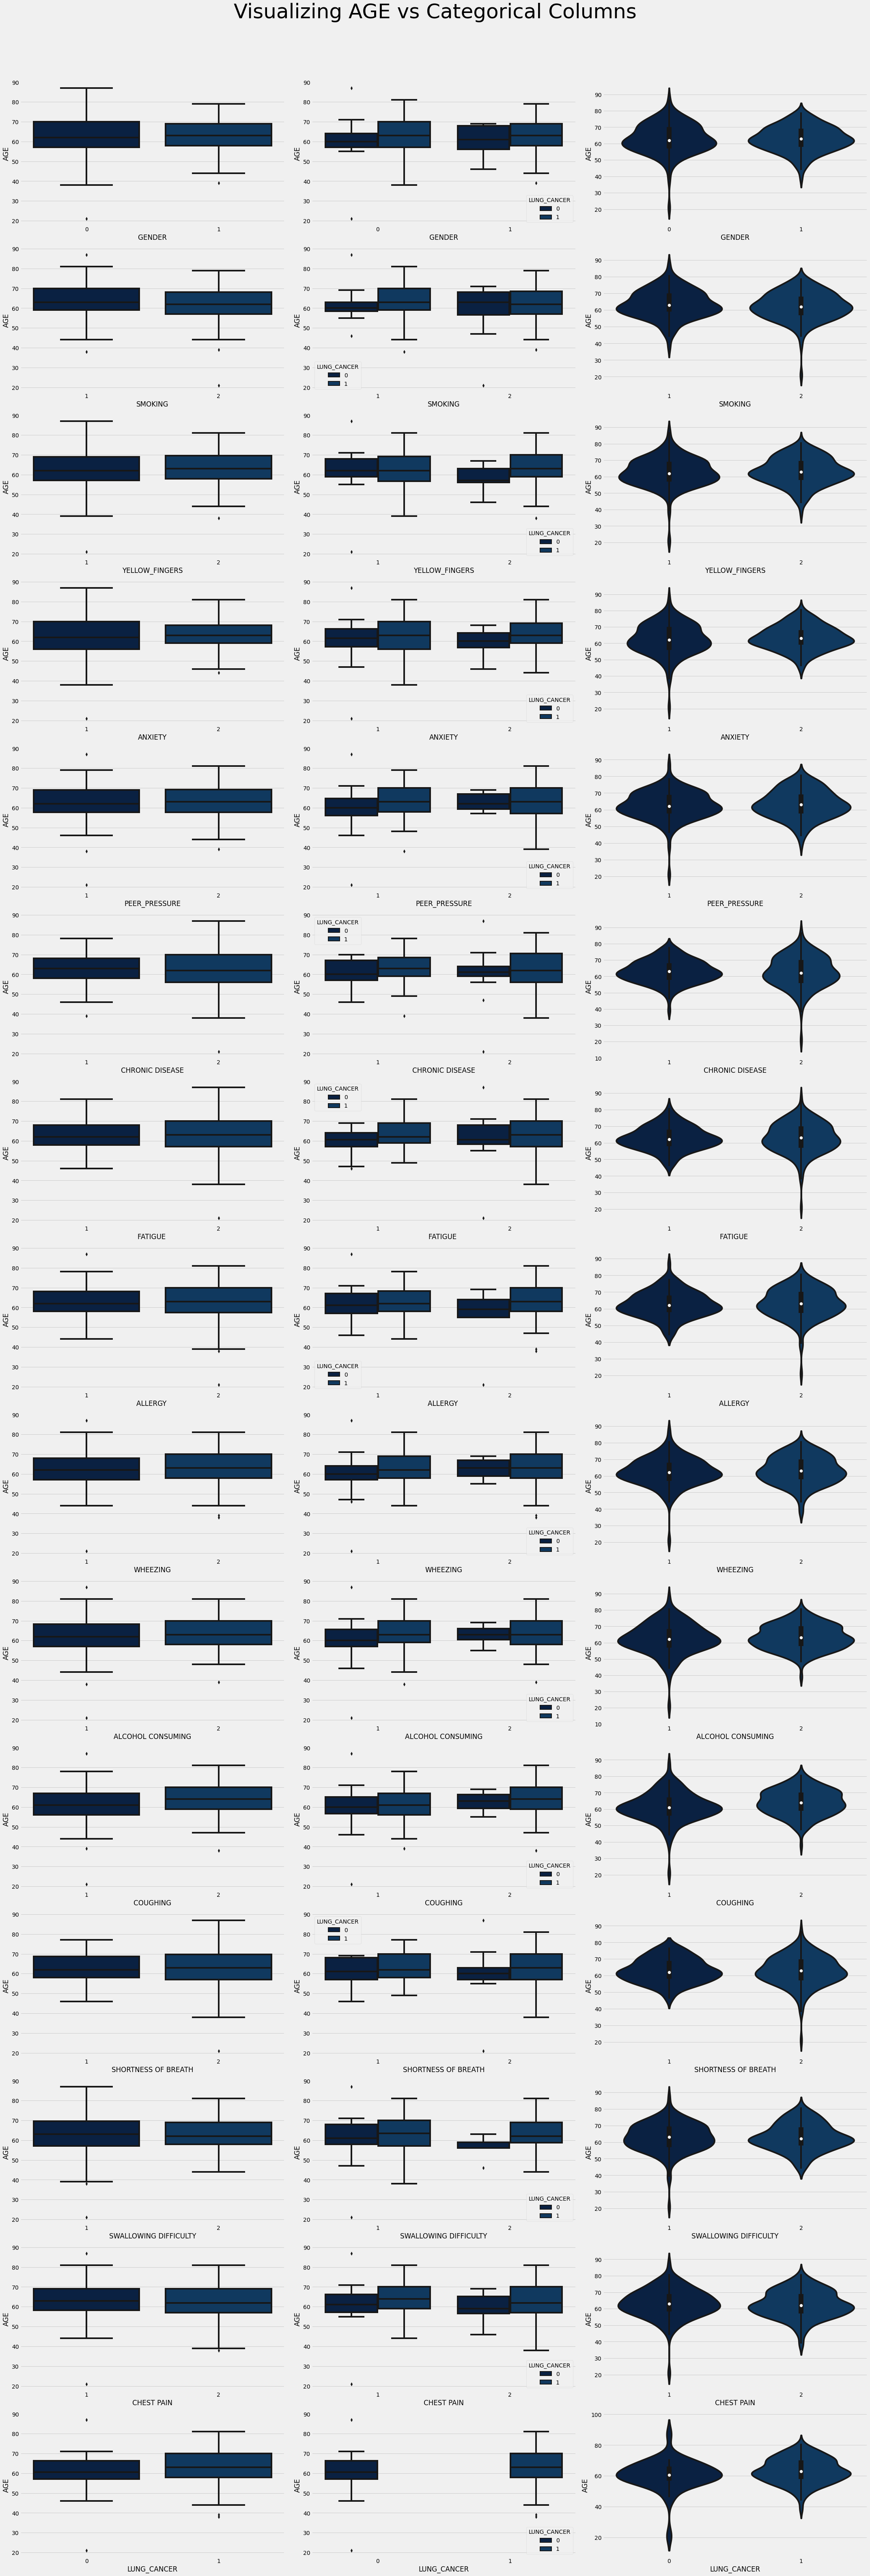

In [17]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

<AxesSubplot:>

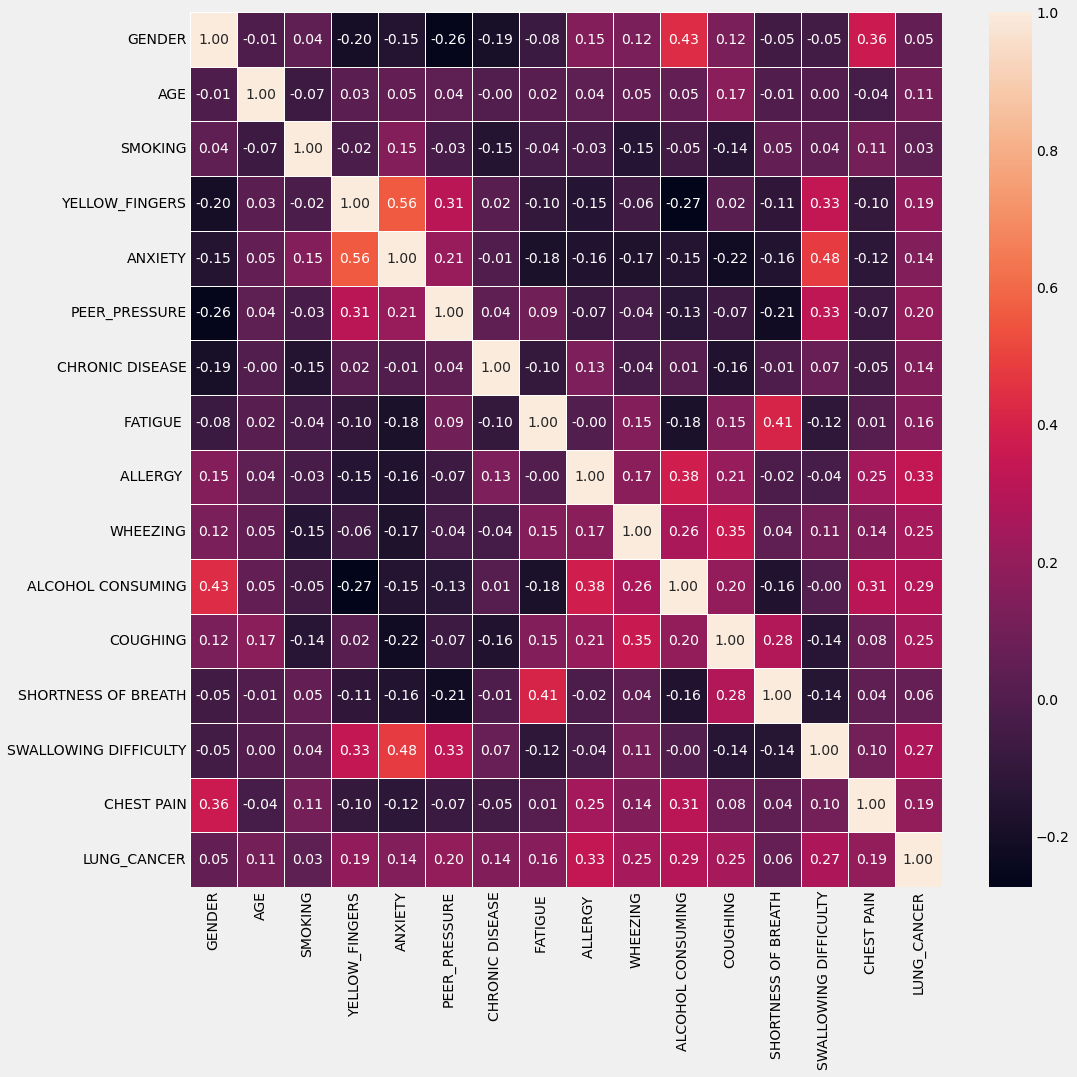

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

### Observations:
> There is **multicollinearity** present in the data.

# <b>4 <span style='color:#6497b1'>|</span> Data Preprocessing</b>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Separating Independent and Dependent Features</b></p>
</div>

In [19]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Changing values of columns from 2,1 to 1,0</b></p>
</div>

In [20]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Oversampling of Minority Class</b></p>
</div>

In [27]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Train Test Split</b></p>
</div>

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Scaling of AGE column</b></p>
</div>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
213,1,0.081347,1,1,1,1,1,0,0,0,1,0,0,1,1
129,0,-0.045261,0,0,0,0,1,1,0,0,0,0,1,0,0
105,0,-0.425086,0,0,0,0,1,1,0,0,0,0,1,0,0
146,1,-1.564561,0,1,0,0,1,1,1,1,1,1,1,0,1
267,1,-0.425086,1,1,1,1,1,0,1,0,1,0,0,1,1


# <b>5 <span style='color:#6497b1'>|</span>Model Building</b>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Metric to Use: Recall</b></p>
</div>

## $Recall = \frac{True Positives}{(True Positives + False Negatives)}$ <br>

### Recall would be the best metric because here were are concerned about measuring how many Lung Cancer Patients were missclassified as Non Lung Cancer.<br> Reduce False Negatives!

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNeighbors Classifier - 78%</b></p>
</div>

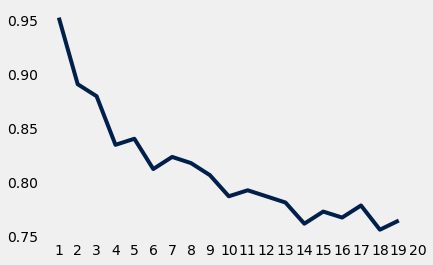

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        60
           1       1.00      0.78      0.88        59

    accuracy                           0.89       119
   macro avg       0.91      0.89      0.89       119
weighted avg       0.91      0.89      0.89       119



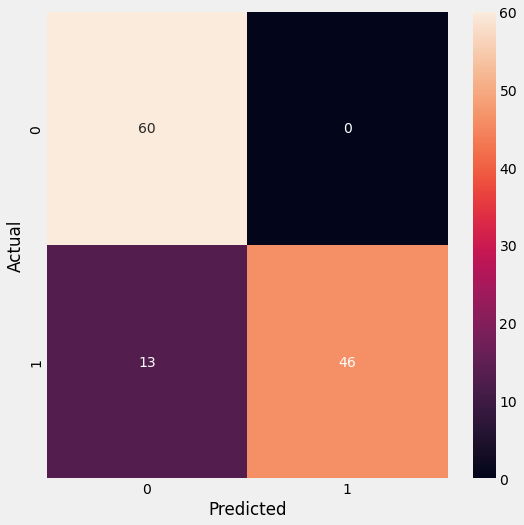

In [30]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Support Vector Machine - 98%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 10, 'C': 100}



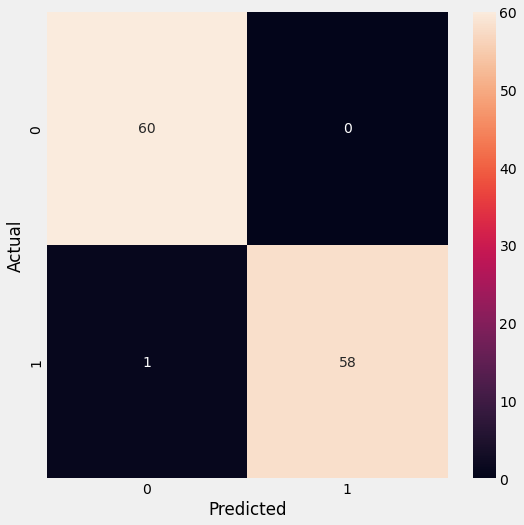

In [31]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression - 85%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.94      0.85      0.89        59

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119



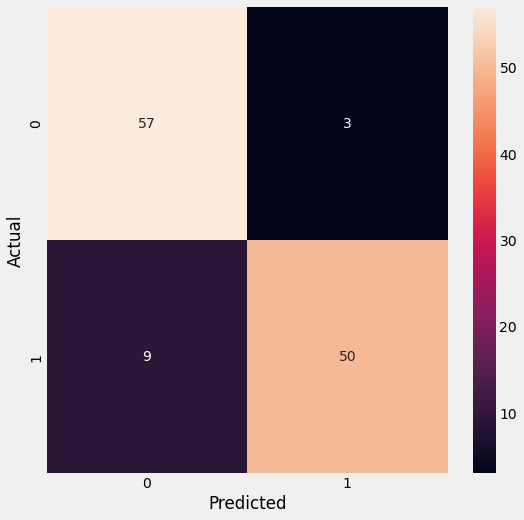

In [32]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest Classifier - 88%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 75}



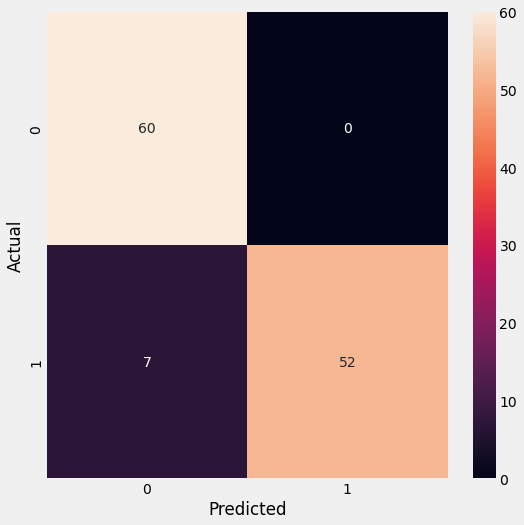

In [33]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Gradient Boosting Classifier - 88%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 150, 'learning_rate': 0.75}



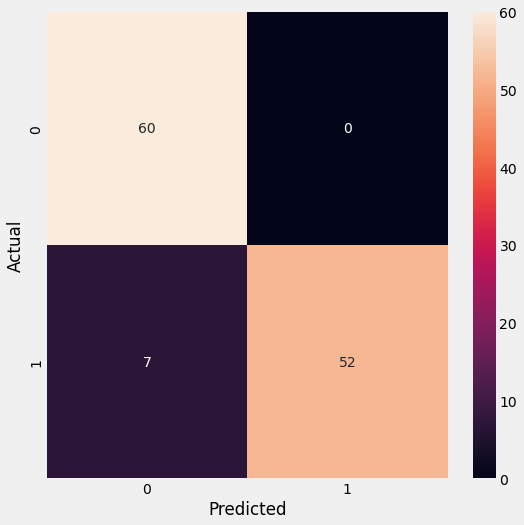

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | LGBM Classifier - 90%</b></p>
</div>

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



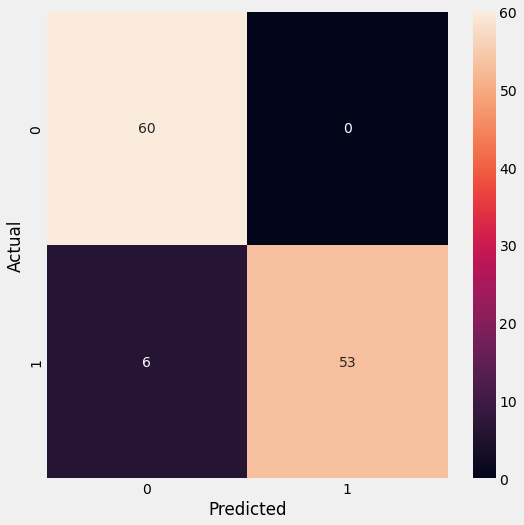

In [35]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Selected Model - SVC</b></p>
</div>

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



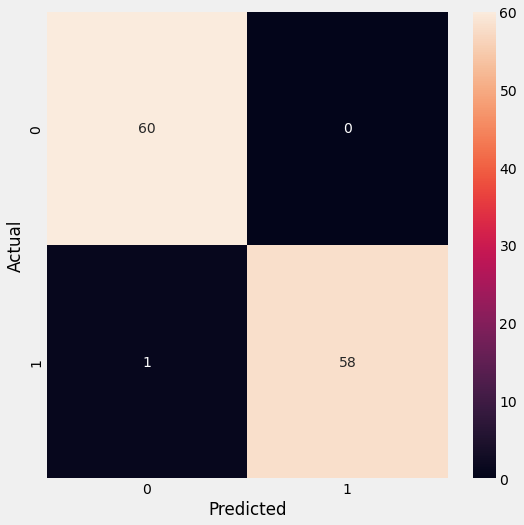

In [49]:
model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))


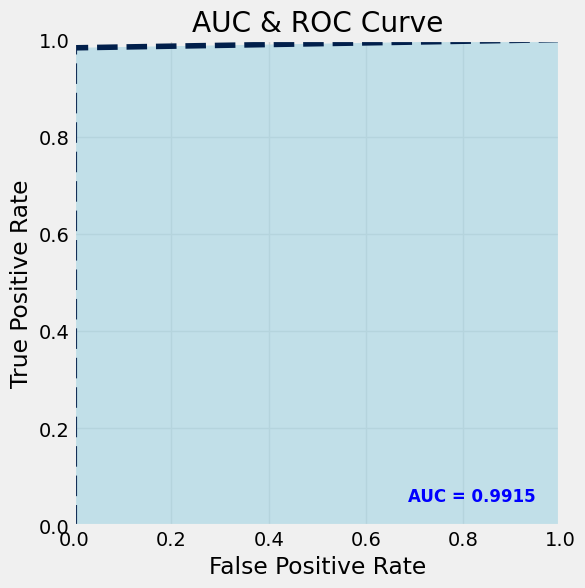

In [52]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# <b>6 <span style='color:#6497b1'>|</span>Conclusion</b>

## <mark>Support Vector Machine</mark> is selected.
#### * **Recall** - 98% 
#### * **Accuracy** - 99%
#### * It has only **one** missclassification.
#### * **AUC** - 0.9915
